In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['Purchased'],axis=1),df["Purchased"]

(      User ID  Gender  Age  EstimatedSalary
 0    15624510    Male   19            19000
 1    15810944    Male   35            20000
 2    15668575  Female   26            43000
 3    15603246  Female   27            57000
 4    15804002    Male   19            76000
 ..        ...     ...  ...              ...
 395  15691863  Female   46            41000
 396  15706071    Male   51            23000
 397  15654296  Female   50            20000
 398  15755018    Male   36            33000
 399  15594041  Female   49            36000
 
 [400 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df.drop(['User ID'],axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [36]:
# converting string to float
mapi={'Male':1,'Female':0}
df=df.replace(mapi)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [37]:
#Train Test Split
x,y=df.drop(['Purchased'],axis=1),df['Purchased']

In [38]:
# train_test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(300, 3)
(100, 3)
(300,)
(100,)


In [40]:
# standrd scaler
from sklearn.preprocessing import StandardScaler
sc_scale=StandardScaler()
xtrain=sc_scale.fit_transform(xtrain)
xtest=sc_scale.transform(xtest)

In [41]:
# Logistic regression model is build 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [43]:
y_pred=classifier.predict(xtest)

In [44]:
# importing confusion matrix and displaying it for data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print("Confusion matrix : \n",cm)

Confusion matrix : 
 [[65  3]
 [ 7 25]]


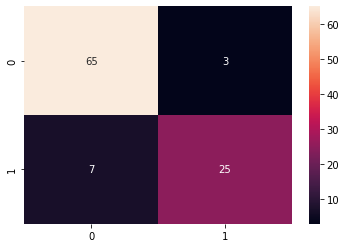

In [45]:
# confusion matrix using heatmap of seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.show()

In [46]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy is :",accuracy_score(ytest,y_pred)*100,'%')

Accuracy is : 90.0 %


In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [49]:
# precision tp/(tp+fp)
precision=precision_score(ytest,y_pred)
print('Precision: %f' % precision)

Precision: 0.892857


In [50]:
#recall: tp/(tp+fn)
recall=recall_score(ytest,y_pred)
print('Recall: %f' % recall)

Recall: 0.781250


In [51]:
# f1 : 2 tp/(2 tp+fp+fn)
f1=f1_score(ytest,y_pred)
print('F1 score: %f' % f1)

F1 score: 0.833333
